# Set Membership

The cell below defines two **abstract classes**: the first represents a set and basic insert/search operations on it. You will need to impement this API four times, to implement (1) sequential search, (2) binary search tree, (3) balanced search tree, and (4) bloom filter. The second defines the synthetic data generator you will need to implement as part of your experimental framework. <br><br>**Do NOT modify the next cell** - use the dedicated cells further below for your implementation instead. <br>

In [1]:
# DO NOT MODIFY THIS CELL

from abc import ABC, abstractmethod  

# abstract class to represent a set and its insert/search operations
class AbstractSet(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # inserts "element" in the set
    # returns "True" after successful insertion, "False" if the element is already in the set
    # element : str
    # inserted : bool
    @abstractmethod
    def insertElement(self, element):     
        inserted = False
        return inserted   
    
    # checks whether "element" is in the set
    # returns "True" if it is, "False" otherwise
    # element : str
    # found : bool
    @abstractmethod
    def searchElement(self, element):
        found = False
        return found    
    
    
    
# abstract class to represent a synthetic data generator
class AbstractTestDataGenerator(ABC):
    
    # constructor
    @abstractmethod
    def __init__(self):
        pass           
        
    # creates and returns a list of length "size" of strings
    # size : int
    # data : list<str>
    @abstractmethod
    def generateData(self, size):     
        data = [""]*size
        return data

Use the cell below to define any auxiliary data structure and python function you may need. Leave the implementation of the main API to the next code cells instead.

In [473]:
# ADD AUXILIARY DATA STRUCTURE DEFINITIONS AND HELPER CODE HERE
class RBNode:
    def __init__(self, value, parent, color=False):
        self.value = value
        self.left = None
        self.right = None
        self.color = color
        self.parent = parent

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

Use the cell below to implement the requested API by means of **sequential search**.

In [474]:
class SequentialSearchSet(AbstractSet):
    
    def __init__(self):
        self.data = []

    def insertElement(self, element):
        # ADD YOUR CODE HERE
        if not self.searchElement(element):
            self.data.append(element)
            return True
        return False

    def searchElement(self, element):
        for item in self.data:
            if item == element:
                return True
        return False

Use the cell below to implement the requested API by means of **binary search tree**.

In [475]:
class BinarySearchTreeSet(AbstractSet):
    
    def __init__(self):
        self.root = None

    def insertElement(self, element):
        if self.root is None:
            self.root = Node(element)
            return True
        current = self.root
        while current:
            if current.value == element:
                return False
            elif current.value > element:
                if current.left is None:
                    current.left = Node(element)
                    return True
                current = current.left
            else:
                if current.right is None:
                    current.right = Node(element)
                    return True
                current = current.right

    def searchElement(self, element):
        current = self.root
        while current:
            if current.value == element:
                return True
            elif current.value > element:
                current = current.left
            else:
                current = current.right
        return False

Use the cell below to implement the requested API by means of **balanced search tree**.

In [476]:
class BalancedSearchTreeSet(AbstractSet):
    def __init__(self):
        self.root = None

    def searchElement(self, element):
        found = False
        current = self.root
        while current:
            if current.value == element:
                found = True
                break
            elif current.value > element:
                current = current.left
            else:
                current = current.right
        return found

    def insertElement(self, element):
        if self.root is None:
            new_node = RBNode(element, None, True)
            self.root = new_node
        else:
            parent = None
            node = self.root
            while node is not None:
                parent = node
                if element < node.value:
                    node = node.left
                elif element > node.value:
                    node = node.right
                else:
                    return False
            new_node = RBNode(element, parent, True)
            if new_node.value < parent.value:
                parent.left = new_node
            else:
                parent.right = new_node
        self.balanceTree(new_node)
        return True

    def balanceTree(self, node):
        while node.parent is not None and node.parent.color:
            if node.parent == node.parent.parent.left:
                uncle = node.parent.parent.right
                if uncle is not None and uncle.color:
                    node.parent.color = False
                    uncle.color = False
                    node.parent.parent.color = True
                    node = node.parent.parent
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.rotateLeft(node)

                    node.parent.color = False
                    node.parent.parent.color = True
                    self.rotateRight(node.parent.parent)
            else:
                uncle = node.parent.parent.left
                if uncle is not None and uncle.color:
                    node.parent.color = False
                    uncle.color = False
                    node.parent.parent.color = True
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.rotateRight(node)

                    node.parent.color = False
                    node.parent.parent.color = True
                    self.rotateLeft(node.parent.parent)
        self.root.color = False

    def rotateLeft(self, node):
        right_child = node.right
        node.right = right_child.left
        if right_child.left is not None:
            right_child.left.parent = node
        right_child.parent = node.parent
        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child
        right_child.left = node
        node.parent = right_child

    def rotateRight(self, node):
        left_child = node.left
        node.left = left_child.right
        if left_child.right is not None:
            left_child.right.parent = node
        left_child.parent = node.parent
        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child
        left_child.right = node
        node.parent = left_child

Use the cell below to implement the requested API by means of **bloom filter**.

In [477]:
from bitarray import bitarray
class BloomFilterSet(AbstractSet):
    def __init__(self):
        self.size = 6
        self.num_hashes = 4 # 1-4 hash functions
        self.bit_array = bitarray(self.size)
        self.bit_array.setall(0)
        self.primes = [31, 59, 89, 107]

    def hashElement(self, element, seed):
        return (hash(element) ^ seed + seed) % self.size

    def insertElement(self, element):
        inserted = False
        for prime in self.primes:
            hash_val = self.hashElement(element, prime)
            if self.bit_array[hash_val] == 0:
                inserted = True
                self.bit_array[hash_val] = 1
        return inserted

    def searchElement(self, element):
        for prime in self.primes:
            hash_val = self.hashElement(element, prime)
            if self.bit_array[hash_val] == 0:
                return False
        return True

Use the cell below to implement the **synthetic data generator** as part of your experimental framework.

In [478]:
import string
import random

class TestDataGenerator(AbstractTestDataGenerator):
    
    def __init__(self):
        self.data = []
        self.word_length = 7

    def generateData(self, size):     
        self.data = []
        for i in range(size):
            self.data.append("".join(random.choices(string.ascii_lowercase, k=self.word_length)))
        return self.data

    def generateSearchSet(self, size):
        search_set = []
        for i in range(size//2):
            search_set.append(random.choice(self.data))
            search_set.append("".join(random.choices(string.ascii_lowercase, k=self.word_length)))
        if len(search_set) < size:
            search_set.append(random.choice(self.data))
        return search_set

    def treeWorstCase(self, data):
        return self.merge_sort(data)

    def worstCaseSearch(self, size):
        search_set = []
        for i in range(size):
            # z's ensure that the ascii value is larger than all random strings,
            # string length is 9, so that the string definitly doesn't exist in data
            search_set.append("zzzzzzzzz")
        return search_set

    def bloomFilterFalseTest(self, size):
        # randomly generated strings of length 8, so that the string definitly doesn't exist in data
        search_set = []
        for i in range(size):
            search_set.append("".join(random.choices(string.ascii_lowercase, k=self.word_length+1)))
        return search_set

    def merge_sort(self, data):
        if len(data) <= 1:
            return data
        mid = len(data) // 2
        left = self.merge_sort(data[:mid])
        right = self.merge_sort(data[mid:])
        return self.merge(left, right)

    def merge(self, left, right):
        result = []
        while len(left) > 0 and len(right) > 0:
            if left[0] < right[0]:
                result.append(left[0])
                left = left[1:]
            else:
                result.append(right[0])
                right = right[1:]
        if len(left) > 0:
            result += left
        if len(right) > 0:
            result += right
        return result

Use the cells below for the python code needed to **fully evaluate your implementations**, first on real data and subsequently on synthetic data (i.e., read data from test files / generate synthetic one, instantiate each of the 4 set implementations in turn, then thorouhgly experiment with insert/search operations and measure their performance).

In [ ]:
import timeit
import gc

def read_file(filename):
    my_file = open(filename, 'r')
    data = my_file.read().split()
    my_file.close()
    return data

files = ['test1-mobydick.txt', 'test2-warpeace.txt', 'test3-dickens.txt']
search_set = read_file('testfiles/test-search.txt')


def print_data(Name, insert_time, search_time):
    print(f"Insert and search times for {Name} are as follows:")
    print(f"Insert time: {insert_time:.6f} seconds")
    print(f"Search time: {search_time:.6f} seconds")
    print()

def test_total_time(searchAlg ,search_set, data_set):
    gc.disable()
    insert_time = timeit.timeit(lambda: [searchAlg.insertElement(word) for word in data_set], number=10)/10
    search_time = timeit.timeit(lambda: [searchAlg.searchElement(search_word)
                                         for search_word in search_set], number=10)/10
    gc.enable()
    return insert_time, search_time

def total_times_real():

    for file in files:
        seq = SequentialSearchSet()
        bst = BinarySearchTreeSet()
        rbt = BalancedSearchTreeSet()
        bloom = BloomFilterSet()
        print(f"Testing {file[6:-4]}")
        for searchAlg in (seq, bst, rbt, bloom):
            insert_time, search_time = test_total_time(searchAlg, search_set, read_file(f"testfiles/{file}"))
            print_data(searchAlg.__class__.__name__, insert_time, search_time)
total_times_real()

Test Synthetic Data times | worst case and average case as well as Stress test. Not including the sequential search as Dickens times already in several hundreds implying that sequential search is not viable for sets larger than 5,000,000 elements.

In [470]:
def average_times_synthetic(search, data, size):
    seq = SequentialSearchSet()
    bst = BinarySearchTreeSet()
    rb = BalancedSearchTreeSet()
    bloom = BloomFilterSet()
    if size <= 500000:
        s = (seq ,bst, rb, bloom)
    else:
        s = (bst, rb, bloom)
    for searchAlg in s:
        insert_time, search_time = test_total_time(searchAlg, search, data)
        print_data(searchAlg.__class__.__name__, insert_time, search_time)

def worst_times_synthetic(search, data):
    bst = BinarySearchTreeSet()
    rbt = BalancedSearchTreeSet()
    seq = SequentialSearchSet()
    for alg in (seq, bst, rbt):
        insert_time, search_time = test_total_time(alg, search, data)
        print_data(alg.__class__.__name__, insert_time, search_time)

def test_worst_average(size, search_size):
    tdg = TestDataGenerator()

    print(f"For data set of size: {size}")
    data = tdg.generateData(size)
    search = tdg.generateData(search_size)
    worst = sorted(data)
    worst_search = tdg.worstCaseSearch(search_size)
    if size < 500000:
        print("Worst case:")
        worst_times_synthetic(worst_search, worst)
    print("Average cases:")
    average_times_synthetic(search, data, size)
# for stress test, use 10000000, for worst case comparison use size=10000 and search_size=500
test_worst_average(10000000, 100000)

For data set of size: 10000000
Average cases:
Insert and search times for BinarySearchTreeSet are as follows:
Insert time: 51.912805 seconds
Search time: 0.542141 seconds

Insert and search times for BalancedSearchTreeSet are as follows:
Insert time: 36.870571 seconds
Search time: 0.370116 seconds

Insert and search times for BloomFilterSet are as follows:
Insert time: 5.074942 seconds
Search time: 0.049450 seconds



Testing BloomFilter rate of false positives

In [468]:
def test_bloom_filter_accuracy(sizes):
    bloom = BloomFilterSet()
    RBTree = BalancedSearchTreeSet()
    data = TestDataGenerator()
    words = []
    total = 0
    for n in sizes:
        total += n
        new_words = data.generateData(n)
        search_words = data.bloomFilterFalseTest(n)
        words.extend(new_words)
        for word in new_words:
            bloom.insertElement(word)
            RBTree.insertElement(word)
        false_positives = 0
        for search_word in search_words:
            if bloom.searchElement(search_word) and not RBTree.searchElement(search_word):
                false_positives += 1
        print(f"Total words: {total}")
        print(f"Percentage of false positives: {(false_positives/len(search_words)*100):.2f}")

# Call the function with the default size of 100,000
test_bloom_filter_accuracy([10000, 40000, 50000, 100000, 100000, 100000,
                            100000, 100000, 100000, 100000, 100000, 100000])

Total words: 10000
Percentage of false positives: 0.04
Total words: 50000
Percentage of false positives: 1.40
Total words: 100000
Percentage of false positives: 6.95
Total words: 200000
Percentage of false positives: 29.83
Total words: 300000
Percentage of false positives: 54.58
Total words: 400000
Percentage of false positives: 73.11
Total words: 500000
Percentage of false positives: 85.04
Total words: 600000
Percentage of false positives: 91.67
Total words: 700000
Percentage of false positives: 95.52
Total words: 800000
Percentage of false positives: 97.73
Total words: 900000
Percentage of false positives: 98.71
Total words: 1000000
Percentage of false positives: 99.33


Plotting Binary Search Tree, Red Black Tree and Bloom Filter insert and search times for different sizes of data sets

INSERTION TIMES


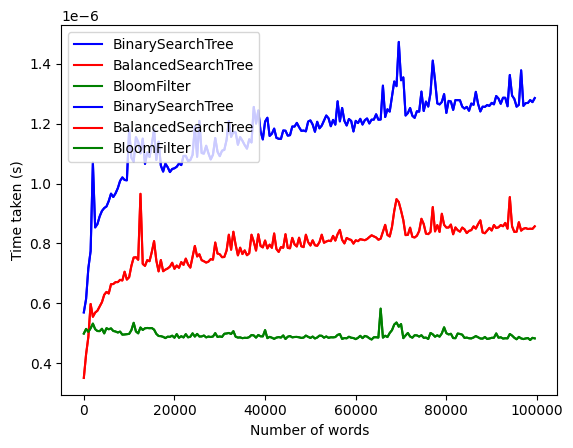

SEARCH TIMES


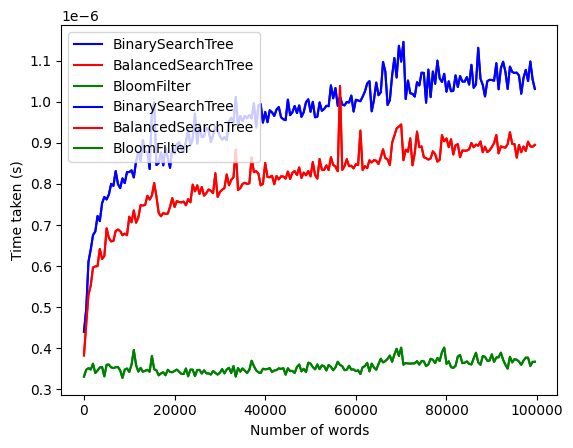

In [472]:
import timeit
import matplotlib.pyplot as plt
import gc


def time_insert(search_alg, data):
    insert_time = timeit.timeit(lambda: [search_alg.insertElement(word)
                                         for word in data], number=1000)/1000
    return insert_time


def time_search(search_alg, search_set):
    search_time = timeit.timeit(lambda: [search_alg.searchElement(search_word)
                                         for search_word in search_set], number=1000)/1000
    return search_time


def run_tests(total_size, test):
    results = {
        'bst': {'insert_times': [], 'search_times': []},
        'rbt': {'insert_times': [], 'search_times': []},
        'bf': {'insert_times': [], 'search_times': []}
    }

    bst = BinarySearchTreeSet()
    rbt = BalancedSearchTreeSet()
    bf = BloomFilterSet()

    data_set = []
    for n in range(0, total_size, 500):
        new_data = test.generateData(500)
        search_set = test.generateSearchSet(100)
        data_set.extend(new_data)

        for alg_name, alg in [('bst', bst), ('rbt', rbt), ('bf', bf)]:
            insert_time = time_insert(alg, new_data)
            results[alg_name]['insert_times'].append(insert_time/500)

            search_time = time_search(alg, search_set)
            results[alg_name]['search_times'].append(search_time/100)
    return results


def plot_graph(bst, rbt, bf, input_sizes):
    plt.plot(input_sizes, bst, color='blue', label='BinarySearchTree')
    plt.plot(input_sizes, rbt, color='red', label='BalancedSearchTree')
    plt.plot(input_sizes, bf, color='green', label='BloomFilter')
    plt.plot(input_sizes, bst, color='blue', label='BinarySearchTree')
    plt.plot(input_sizes, rbt, color='red', label='BalancedSearchTree')
    plt.plot(input_sizes, bf, color='green', label='BloomFilter')
    plt.xlabel('Number of words')
    plt.ylabel('Time taken (s)')
    plt.legend()
    plt.show()


def generate_graphs():
    test = TestDataGenerator()
    total_size = 100000

    results = run_tests(total_size, test)

    input_sizes = range(0, total_size+1, 500)

    print("INSERTION TIMES")
    plot_graph(results['bst']['insert_times'], results['rbt']['insert_times'], results['bf']['insert_times'], input_sizes)

    print("SEARCH TIMES")
    plot_graph(results['bst']['search_times'], results['rbt']['search_times'], results['bf']['search_times'], input_sizes)

generate_graphs()

Seperately Graphing each algorithm's worst and average cases for both insert and search. Same code used for all algorithms, change the initialization to desired algorithm and change data size and step as labellled.

SequentialSearchSet


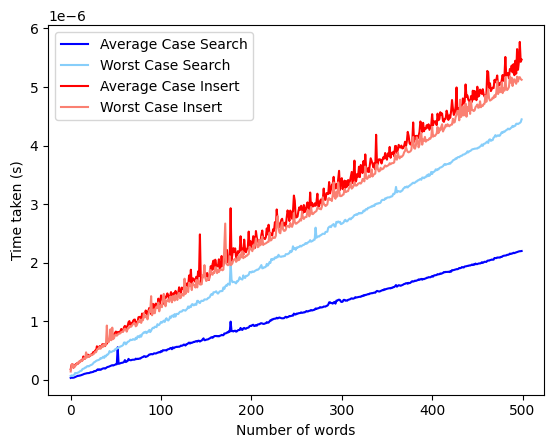

In [459]:
def single_run_tests(total_size, test, average, worst):
    results = {
        'average': {'insert_times': [], 'search_times': []},
        'worst': {'insert_times': [], 'search_times': []}
    }

    data_set = test.generateData(total_size)
    data_set_worst = test.treeWorstCase(data_set)
    prev = 0
    search_set = test.generateSearchSet(100)
    worst_search = test.worstCaseSearch(100)
    for n in range(0, total_size): # add extra step e.g. (for size 20,000, step 50 is suitable)

        insert_time = time_insert(average, data_set[prev:n])
        results['average']['insert_times'].append(insert_time/max(n-prev, 1))

        insert_time_w = time_insert(worst, data_set_worst[prev:n])
        results['worst']['insert_times'].append(insert_time_w/max(n-prev, 1))

        search_time = time_search(average, search_set)
        results['average']['search_times'].append(search_time/len(search_set))

        search_time_w = time_search(worst, worst_search)
        results['worst']['search_times'].append(search_time_w/len(worst_search))

        prev = n
    return results

def single_plot_graph(normalS, worstS, normalI, worstI, input_sizes, seq=False):
    plt.plot(input_sizes, normalS, color='blue', label='Average Case Search')
    plt.plot(input_sizes, worstS, color='lightskyblue', label='Worst Case Search')
    plt.plot(input_sizes, normalI, color='red', label='Average Case Insert')
    plt.plot(input_sizes, worstI, color='salmon', label='Worst Case Insert')
    plt.xlabel('Number of words')
    plt.ylabel('Time taken (s)')
    plt.legend()
    plt.show()


def generate_graphs_single():
    test = TestDataGenerator()
    total_size = 500 # change to desired size
    input_sizes = range(0, total_size) # same step as for loop should be added here too
    # algorithms can be changed to get worst and average case for each seperate algorithm
    alg = BinarySearchTreeSet()  # BalancedSearchTreeSet(), SequentialSearchSet()
    alg_w = BinarySearchTreeSet() # BalancedSearchTreeSet(), SequentialSearchSet()
    results = single_run_tests(total_size, test, alg, alg_w)
    print(alg.__class__.__name__)
    single_plot_graph(results['average']['search_times'], results['worst']['search_times'], results['average']['insert_times'], results['worst']['insert_times'], input_sizes)


generate_graphs_single()